## 1. HR Analytics

In [2]:
# import the required packages
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import random
import statsmodels.api as sm
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
%matplotlib inline
import time 

# For logistic and linear regression
from sklearn.linear_model import LogisticRegression

# For decision tree
from sklearn import tree

# For ANN
from sklearn.neural_network import MLPClassifier

# For AdaBoost
from sklearn.ensemble import AdaBoostClassifier

# For K-folds cross validation
from sklearn.model_selection import cross_val_score, cross_validate

# Random Forest
from sklearn. ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [3]:
def print_results(results):
    print("BEST PARAM: {}\n".format(results.best_params_))
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print("{} (+/1 {}) for {}".format(round(mean, 3), round(std*2,3), params))
        

### 1.1 Load and Sample the data

#### Loading the HR Data

In [4]:
# Load the full dataset
df = pd.read_csv('hr_data_new.csv')

# Select a subset of colulmns
df = df[["department", "region", "education", "gender", "recruitment_channel", 
                  "no_of_trainings", "age", "previous_year_rating", "length_of_service", 
                  "KPIs_met", "awards_won?", "avg_training_score", "is_promoted"]]

In [4]:
df.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met,awards_won?,avg_training_score,is_promoted
0,5,26,0,0,1,1,0.375,5.0,0,1,0,0,1
1,5,30,0,1,1,1,0.325,5.0,2,1,0,0,1
2,5,33,2,1,0,1,0.750,4.0,3,1,0,0,1
3,4,28,0,1,0,1,0.175,3.0,0,1,1,1,1
4,5,28,0,1,1,1,0.175,3.0,0,0,0,2,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9336 entries, 0 to 9335
Data columns (total 13 columns):
department              9336 non-null int64
region                  9336 non-null int64
education               9336 non-null int64
gender                  9336 non-null int64
recruitment_channel     9336 non-null int64
no_of_trainings         9336 non-null int64
age                     9336 non-null float64
previous_year_rating    9336 non-null float64
length_of_service       9336 non-null int64
KPIs_met                9336 non-null int64
awards_won?             9336 non-null int64
avg_training_score      9336 non-null int64
is_promoted             9336 non-null int64
dtypes: float64(2), int64(11)
memory usage: 948.3 KB


In [6]:
# Drop all the rows with NA records
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9336 entries, 0 to 9335
Data columns (total 13 columns):
department              9336 non-null int64
region                  9336 non-null int64
education               9336 non-null int64
gender                  9336 non-null int64
recruitment_channel     9336 non-null int64
no_of_trainings         9336 non-null int64
age                     9336 non-null float64
previous_year_rating    9336 non-null float64
length_of_service       9336 non-null int64
KPIs_met                9336 non-null int64
awards_won?             9336 non-null int64
avg_training_score      9336 non-null int64
is_promoted             9336 non-null int64
dtypes: float64(2), int64(11)
memory usage: 1021.1 KB


#### Sampling the HR Data

In [5]:
# Define Model Inputs (X) and Output (y)
X = df.drop('is_promoted',axis=1)
y = df["is_promoted"]

In [6]:
# Split both Inputs (X) and Ouput (y) into training set (70%) and testing set (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### 1.2 Build the Model(s)

### 1.2.1 Using Logistic Regression

#### Train the Model using testing

In [41]:
# Create the model "lg"
lg = LogisticRegression(solver='lbfgs', # optimization solver, default mode is lbfgs
                        max_iter=10000) # maximum iterations: set a big number to make sure the optimization solver will run enough iterations for optimal model converge


In [42]:
# Fit the model to the training set
lg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
# print out the model coefficients and intercept
print(lg.coef_)
print(lg.intercept_)

[[ 0.09909963  0.06236606  0.00790451 -0.22794505 -0.75851193  0.37042613
   0.08748277  1.60301058  2.17919155  0.48565619]]
[-2.77392505]


In [44]:
# calculated the training accuracy
print(lg.score(X_train, y_train), '(Train Accuracy)')

0.722264728385616 (Train Accuracy)


In [47]:
# Calculated the fitted values for training set
y_fitted = lg.predict(X_train) # returns 0 or 1
y_fitted_prob = lg.predict_proba(X_train)[:,-1] # returns probabilities

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [48]:
print(y_fitted)
print(y_fitted_prob)

[0 0 0 ... 1 0 1]
[0.07642186 0.31747747 0.38106416 ... 0.5507132  0.2763727  0.74078067]


#### Evaluate the Model using testing

In [15]:
# calculated the testing accuracy
print(lg.score(X_test, y_test), '(Test Accuracy)')

0.7179578721885042 (Test Accuracy)


#### Improving the Model 

In [16]:
# The lg model refers to sklearn model and lg2 model refers to statsmodel.api model

# Create another model lg2 using statsmodel.api: the Logit method and fit function
lg2 = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.569040
         Iterations 6


In [17]:
# Print out the Model Summary
lg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            is_promoted   No. Observations:                 6535
Model:                          Logit   Df Residuals:                     6523
Method:                           MLE   Df Model:                           11
Date:                Mon, 25 Jan 2021   Pseudo R-squ.:                  0.1790
Time:                        14:23:19   Log-Likelihood:                -3718.7
converged:                       True   LL-Null:                       -4529.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
department              -0.0219      0.017     -1.308      0.191      -0.055       0.011
region                  -0.0017      0.004     -0.450      0.653      -0.009       0.006
education                0.1181      0.034      3.479      0.001       0.052       0.185
gender                  -0.2595      0.061     -4.222      0.000      -0.380      -0.139
recruitment_channel     -0.1543      0.051     -3.027      0.002      -0.254      -0.054
no_of_trainings         -0.6654      0.053    -12.602      0.000      -0.769      -0.562
age                     -1.9150      0.185    -10.332      0.000      -2.278      -1.552
previous_year_rating     0.1028      0.024      4.345      0.000       0.056       0.149
length_of_service        0.0789      0.029      2.767      0.006       0.023       0.135
KPIs_met                 1.4905      0.059     25.062      0.000       1.374       1.607
awards_won?              2.1780      0.165     13.183      0.000       1.854       2.502
avg_training_score       0.3162      0.032     10.031      0.000       0.254       0.378
========================================================================================
"""

From the above model summary, we can see that `gender`, `no_of_trainings`, `age`, `previous_year_rating`, `KPIs_met`, `awards_won?`,`education`, `recruitment_channel` and `avg_training_score` have close to ZERO **p-value** (i.e. the column `P>|z|`). It means we have very high confidence on the coefficients of these features, or say these features are the most strong indicators to predict `is_promoted`. 

On the other hand,  `department`,`region` and `length_of_service` have very high **p-value**. It means we have very low confidence on the coeficients of these features and these features may not be the good indicators to predict `is_promoted`. 

We will utilize **p-value** to improve the model below.

##### (i) By dropping features with P|z|>0.05

I will attempt to utilize the **p-value** obtained from the above Stats Model (the column `P>|z|`) and adjust the model inputs accordingly. Features with a P-value greater than `0.05`are considered weak predictors of the null hypothesis. These features tend to have little correlation to our target variable. Hence, we cannot reject that a non-zero correlation exists. With that said, I will remove these features, then train and evaluate the adjusted model to see whether I can improve the model performance by reducing the RMSE. 

In [18]:
# Define Model Inputs (X) and Output (y)
X = df.drop(['department','region','length_of_service','is_promoted'],axis=1) 
y = df["is_promoted"] 

In [19]:
# Split both Inputs (X) and Ouput (y) into training set (70%) and testing set (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [20]:
# Create and Train the Logistic Regression Model

# Create the model "lg"
lg = LogisticRegression(solver='lbfgs', # optimization solver, default mode is lbfgs
                        max_iter=10000) # maximum iterations: set a big number to make sure the optimization solver will run enough iterations for optimal model converge

# Fit the model to the training set
lg.fit(X_train,y_train)

# print out the model coefficients and intercept
print(lg.coef_)
print(lg.intercept_)

[[ 0.10642993  0.06025472  0.00886578 -0.22976113 -0.47835031  0.37368162
   1.59385364  2.15764405  0.48439371]]
[-2.76447397]


In [21]:
# Calculate the training accuracy
print(lg.score(X_train, y_train), '(Train Accuracy)')

# Calculate the fitted values for training set
y_fitted = lg.predict(X_train) # returns 0 or 1
y_fitted_prob = lg.predict_proba(X_train)[:,0] # returns probabilities

0.7213465952563122 (Train Accuracy)


In [22]:
# Calculated the testing accuracy
print(lg.score(X_test, y_test), '(Test Accuracy)')

0.7097465191003213 (Test Accuracy)


In [23]:
# Use Stats Model to evaluate the p-value of each coefficient
lg2 = sm.Logit(y_train, X_train).fit()
# Print out the Model Summary
lg2.summary()

Optimization terminated successfully.
         Current function value: 0.569830
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            is_promoted   No. Observations:                 6535
Model:                          Logit   Df Residuals:                     6526
Method:                           MLE   Df Model:                            8
Date:                Mon, 25 Jan 2021   Pseudo R-squ.:                  0.1779
Time:                        14:23:19   Log-Likelihood:                -3723.8
converged:                       True   LL-Null:                       -4529.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
education                0.1238      0.034      3.679      0.000       0.058       0.190
gender                  -0.2886      0.058     -4.933      0.000      -0.403      -0.174
recruitment_channel     -0.1621      0.051     -3.208      0.001      -0.261      -0.063
no_of_trainings         -0.6937      0.050    -13.870      0.000      -0.792      -0.596
age                     -1.7002      0.154    -11.063      0.000      -2.001      -1.399
previous_year_rating     0.0896      0.021      4.238      0.000       0.048       0.131
KPIs_met                 1.4854      0.059     25.196      0.000       1.370       1.601
awards_won?              2.1432      0.165     13.003      0.000       1.820       2.466
avg_training_score       0.3370      0.025     13.385      0.000       0.288       0.386
========================================================================================
"""

#### Comments on the Performance

The model performance of the training and testing accuracy did not improve after removing features with `P>|z|` > 0.05\
0.7323641928079572 (Train Accuracy) --> 0.7228768171384851 (Train Accuracy)\
0.7179578721885042 (Test Accuracy) --> 0.7097465191003213 (Test Accuracy)

##### (ii) By adding back features from dataset

In [24]:
# Load the full dataset
df_new = pd.read_csv('hr_data_new.csv')

# Select a subset of colulmns
df_new = df_new[["department", "region", "education", "gender", "recruitment_channel", 
                  "no_of_trainings", "age", "previous_year_rating", "length_of_service", 
                  "KPIs_met", "awards_won?", "avg_training_score", "is_promoted"]]

In [25]:
# Define Model Inputs (X) and Output (y)
X = df_new.drop(['department','region','is_promoted'],axis=1) #drop is_promoted
y = df_new["is_promoted"] 

In [26]:
# Split both Inputs (X) and Ouput (y) into training set (70%) and testing set (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [27]:
# Create and Train the Logistic Regression Model

# Create the model "lg"
lg = LogisticRegression(solver='lbfgs', # optimization solver, default mode is lbfgs
                        max_iter=10000) # maximum iterations: set a big number to make sure the optimization solver will run enough iterations for optimal model converge

# Fit the model to the training set
lg.fit(X_train,y_train)

# print out the model coefficients and intercept
print(lg.coef_)
print(lg.intercept_)

[[ 0.09909963  0.06236606  0.00790451 -0.22794505 -0.75851193  0.37042613
   0.08748277  1.60301058  2.17919155  0.48565619]]
[-2.77392505]


In [28]:
# Calculate the training accuracy
print(lg.score(X_train, y_train), '(Train Accuracy)')

# Calculate the fitted values for training set
y_fitted = lg.predict(X_train) # returns 0 or 1
y_fitted_prob = lg.predict_proba(X_train)[:,0] # returns probabilities

0.722264728385616 (Train Accuracy)


In [29]:
# Calculated the testing accuracy
print(lg.score(X_test, y_test), '(Test Accuracy)')

0.7129596572652624 (Test Accuracy)


In [30]:
# Use Stats Model to evaluate the p-value of each coefficient
lg2 = sm.Logit(y_train, X_train).fit()
# Print out the Model Summary
lg2.summary()

Optimization terminated successfully.
         Current function value: 0.569237
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            is_promoted   No. Observations:                 6535
Model:                          Logit   Df Residuals:                     6525
Method:                           MLE   Df Model:                            9
Date:                Mon, 25 Jan 2021   Pseudo R-squ.:                  0.1788
Time:                        14:23:20   Log-Likelihood:                -3720.0
converged:                       True   LL-Null:                       -4529.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
education                0.1180      0.034      3.497      0.000       0.052       0.184
gender                  -0.2886      0.059     -4.930      0.000      -0.403      -0.174
recruitment_channel     -0.1632      0.051     -3.228      0.001      -0.262      -0.064
no_of_trainings         -0.6925      0.050    -13.848      0.000      -0.790      -0.594
age                     -1.9679      0.182    -10.805      0.000      -2.325      -1.611
previous_year_rating     0.0863      0.021      4.072      0.000       0.045       0.128
length_of_service        0.0793      0.029      2.781      0.005       0.023       0.135
KPIs_met                 1.4937      0.059     25.269      0.000       1.378       1.610
awards_won?              2.1655      0.165     13.118      0.000       1.842       2.489
avg_training_score       0.3376      0.025     13.402      0.000       0.288       0.387
========================================================================================
"""

In [31]:
# With removal of Department Head, region and is_promoted
lg = LogisticRegression()
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}
cv = GridSearchCV(lg, parameters, cv = 5)
cv.fit(X_train,y_train)
print_results(cv)
print('training accuracy is: ', cv.score(X_train,y_train))
print('testing accuracy is: ', cv.score(X_test, y_test))

C:\Users\sammi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sammi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sammi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sammi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sammi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

BEST PARAM: {'C': 0.1}

0.683 (+/1 0.016) for {'C': 0.001}
0.716 (+/1 0.021) for {'C': 0.01}
0.723 (+/1 0.016) for {'C': 0.1}
0.722 (+/1 0.01) for {'C': 1}
0.723 (+/1 0.011) for {'C': 10}
0.723 (+/1 0.011) for {'C': 100}
0.723 (+/1 0.011) for {'C': 1000}
training accuracy is:  0.7237949502677888
testing accuracy is:  0.7122456265619421


C:\Users\sammi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sammi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sammi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sammi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sammi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

#### Comments on the Performance

The model performance of the training and testing accuracy **did not improve** after removing features with `P>|z|` > 0.05\

**Before Removing any features**\
0.732 (Train Accuracy)\
0.718 (Test Accuracy)

**After Removing 'department','region','length_of_service','is_promoted'**\
0.732 (Train Accuracy) --> 0.723 (Train Accuracy)\
0.718 (Test Accuracy) --> 0.710 (Test Accuracy) \
After removing all the features that had a P-value more than 0.05, which are insignificant predictors of the is_promoted variable, he training and testing accuracy dropped by 1.3% and 1.14% respectively. This shows that removing the less signiificant features did not help improve the model's accuracy.

**After Removing 'department','region','is_promoted'**\
0.732 (Train Accuracy) --> 0.722 (Train Accuracy)\
0.718 (Test Accuracy) --> 0.713 (Test Accuracy)\
Since length_of_service has a P-value slightly above the threshold of 0.05, i.e. 0.06, we will add it back into the model. After adding back length_of_service feature into the model, the training and testing accuracy improved marginally by 0.127% and 0.451% respectively from the earlier method. 

**After using GridSearch**\
0.724 (Train Accuracy)\
0.723 (Test Accuracy) --> improved by 1.83% when {'C': 0.1}

### 1.2.2 Using Decision Trees

In [4]:
df_new = pd.read_csv('hr_data_new.csv')

In [5]:
# Define Model Inputs (X) and Output (y)
X = df_new.drop('is_promoted',axis=1)
y = df_new["is_promoted"]

In [6]:
# Split both Inputs (X) and Ouput (y) into training set (70%) and testing set (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#### Train the Model

In [7]:
# Create Decision Tree Model
decision_tree = tree.DecisionTreeClassifier(max_depth = 2)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

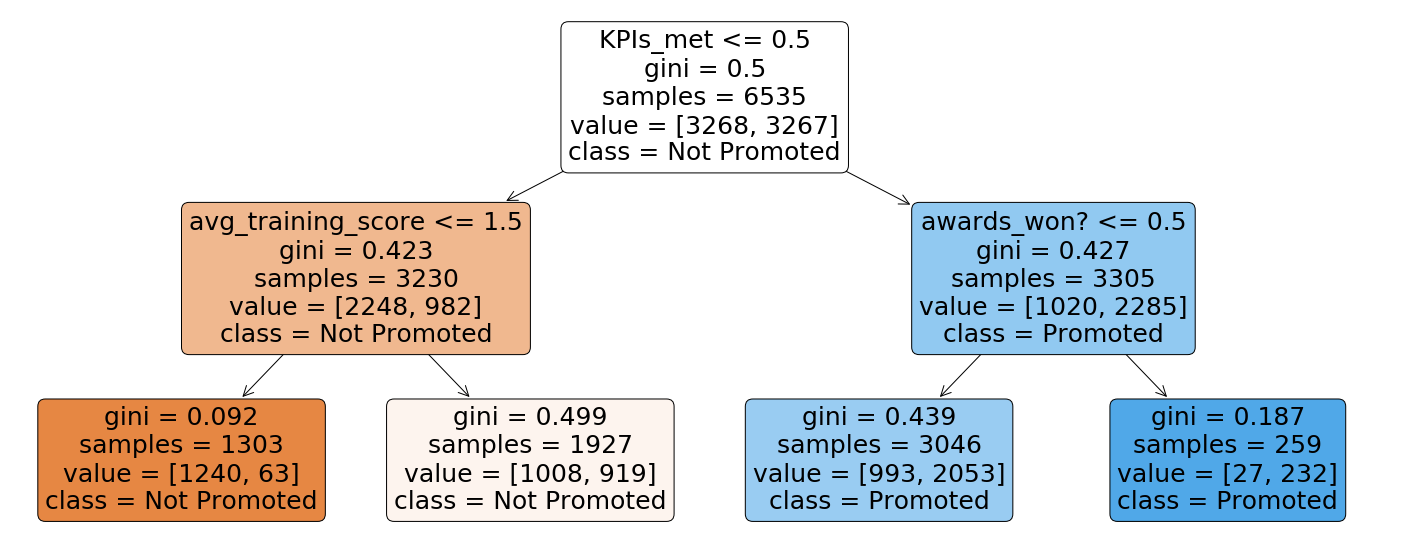

In [9]:
plt.figure(figsize=(25,10))
tree.plot_tree(decision_tree,
              feature_names = list(df_new.drop(['is_promoted'], axis=1)),
                class_names = ['Not Promoted', 'Promoted'],
                rounded = True,
                filled= True)
plt.savefig('assignment2_tree_before.png',format='png')
plt.show()             

#Note that the decision tree on Jupyter looks through each colun e.g. title, age, gender.. 
#to determine which is the most important variable with the most reduction in gini impurity.

#### Evaluate the Model using testing

(i) By `score` function

In [10]:
#training acc
train_acc = decision_tree.score(X_train, y_train)
print('the training accuracy is: ', train_acc)

the training accuracy is:  0.6936495791889824


In [11]:
#testing acc
test_acc = decision_tree.score(X_test, y_test)
print('the testing accuracy is: ', test_acc)

the testing accuracy is:  0.682256337022492


(ii) By `K-folds cross validation` function

In [12]:
from sklearn.model_selection import cross_val_score, cross_validate

# Evaluate the Model using K-folds Cross validation
results  = cross_validate(decision_tree, X, y, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', np.mean(results['train_score']))
print('test_score: ', np.mean(results['test_score']))

train_score:  0.6902313485328566
test_score:  0.6902311394479368


#### Improving the Model (By hyper tuning)

In [13]:
# Use GridSearch to find the best combination of model hyperparameters

dt = tree.DecisionTreeClassifier(max_depth = 2)

param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10], "min_samples_split" : [2, 4, 10], 'max_depth' : [2,3,4,5,6,7]}

gs = GridSearchCV(dt, param_grid=param_grid, scoring='accuracy', cv= 5, n_jobs=-1)
# cv: number of partitions for cross validation
# n_jobs: number of jobs to run in parallel, -1 means using all processors

gs = gs.fit(X_train, y_train) 

print("Best training score: ",gs.best_score_)
print(gs.best_params_)

Best training score:  0.7764345830145372
{'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 10}


In [11]:
# Use GridSearch to find the best combination of model hyperparameters

dt = tree.DecisionTreeClassifier(max_depth = 2)

param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10], "min_samples_split" : [2, 4, 10], 'max_depth' : [2,3,4,5,6,7]}
start = time.time()
gs = GridSearchCV(dt, param_grid=param_grid, scoring='accuracy', cv= 5, n_jobs=-1)
# cv: number of partitions for cross validation
# n_jobs: number of jobs to run in parallel, -1 means using all processors

gs = gs.fit(X_train, y_train) 
print_results(gs)
print('Execution time: {0:.2f} seconds.'.format(time.time() - start))

BEST PARAM: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 10}

0.694 (+/1 0.023) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.694 (+/1 0.023) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 4}
0.694 (+/1 0.023) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 10}
0.694 (+/1 0.023) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 2}
0.694 (+/1 0.023) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 4}
0.694 (+/1 0.023) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 10}
0.694 (+/1 0.023) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 10, 'min_samples_split': 2}
0.694 (+/1 0.023) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 10, 'min_samples_split': 4}
0.694 (+/1 0.023) for {'criterion': 'g

In [14]:
# Create Decision Tree using the best hyperparameters
decision_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 7, min_samples_leaf = 1, min_samples_split = 10, random_state=2)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=2, splitter='best')

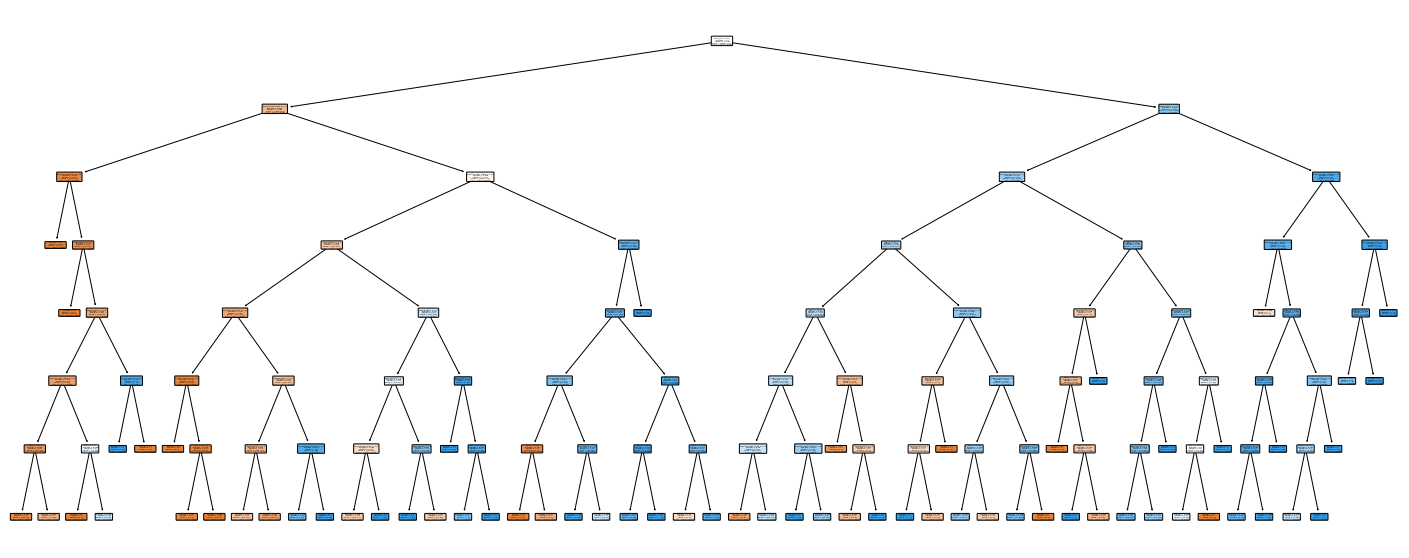

In [17]:
plt.figure(figsize=(25,10)) 
tree.plot_tree(decision_tree,
              feature_names = list(df_new.drop(['is_promoted'], axis=1)),
                class_names = ['Not Promoted', 'Promoted'],
                rounded = True,
                filled= True)
plt.savefig('assignment2_tree_after.png',format='png')
plt.show() 

(i) By `score` function

In [18]:
#training acc
train_acc = decision_tree.score(X_train, y_train)
print('the training accuracy is: ', train_acc)

the training accuracy is:  0.7891354246365723


In [19]:
#testing acc
test_acc = decision_tree.score(X_test, y_test)
print('the testing accuracy is: ', test_acc)

the testing accuracy is:  0.7672259907176009


(ii) By `K-folds cross validation` function

In [20]:
from sklearn.model_selection import cross_val_score, cross_validate

# Evaluate the Model using K-folds Cross validation
results  = cross_validate(decision_tree, X, y, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', np.mean(results['train_score']))
print('test_score: ', np.mean(results['test_score']))

train_score:  0.7844097977340535
test_score:  0.7727075974671284


#### Comments on the Performance

The `DecisionTreeClassifier` has a few model hyperparameters which restrict the shape of Decision Tree, e.g:
* `criterion`: the metrics used to measure the impurity of each node (e.g. gini, entropy and etc.);
* `min_samples_leaf`: the minimum number of samples a leaf node must have;
* `min_samples_split`: the minimum number of samples a node must have before it can be split;
* `max_depth`: the maximum depth of the tree.

**Before GridSearch** 
<br>
(i) By score
* train_score:  0.694
* test_score:  0.682

(ii) By K-folds cross validation
* train_score:  0.690
* test_score:  0.690

**After GridSearch**<br>
In Section One, we only adjusted `max_depth` but since we want to adjust all the above mentioned hyperparameters, we will use Scikit-Learn's `GridSearchCV` to search for the optimal parameter values. 
* train_score:  0.789 <br>
* test_score:  0.767 <br>
* {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 10}

After using GridSearch, I have successfully improveed the training and testing accuracy of the CLassification Model by 8-9%.

In [9]:
# Use GridSearch to find the best combination of model hyperparameters

dt = tree.DecisionTreeClassifier(max_depth = 2)

param_grid = { 'max_depth' : [2]}

gs = GridSearchCV(dt, param_grid=param_grid, scoring='accuracy', cv= 5, n_jobs=-1)
# cv: number of partitions for cross validation
# n_jobs: number of jobs to run in parallel, -1 means using all processors

gs = gs.fit(X_train, y_train) 

print("Best training score: ",gs.best_score_)
print(gs.best_params_)

Best training score:  0.6936495791889824
{'max_depth': 2}


In [10]:
sorted(dict(zip(X_train.columns, gs.best_estimator_.feature_importances_)).items(), key=lambda x: x[1], reverse=True)

[('KPIs_met', 0.6133467837065198),
 ('avg_training_score', 0.357278871875371),
 ('awards_won?', 0.029374344418109183),
 ('department', 0.0),
 ('region', 0.0),
 ('education', 0.0),
 ('gender', 0.0),
 ('recruitment_channel', 0.0),
 ('no_of_trainings', 0.0),
 ('age', 0.0),
 ('previous_year_rating', 0.0),
 ('length_of_service', 0.0)]

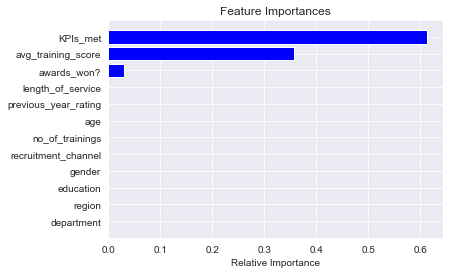

In [11]:
import seaborn as sns
sns.set_style('darkgrid')
features = X_train.columns
importances = gs.best_estimator_.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### 1.2.3 Using Artificial Neural Network

#### Train the Model using testing

In [13]:
# Create the ann model
mlp = MLPClassifier(activation ='logistic', hidden_layer_sizes=(10,), max_iter= 2000, solver = 'sgd', random_state=3)
# Fit the model to the training set
mlp.fit(X_train,y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=2000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=3, shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [175]:
# print out the model coefficients and intercept
print(mlp.coefs_) #connecction weights

[array([[ 1.53066251e-02,  2.01547737e-01,  4.20202011e-02,
        -9.31597282e-02,  3.82425393e-01,  3.29099517e-01,
        -2.44051883e-01, -2.89268331e-01, -4.25207511e-01,
        -1.89560358e-01],
       [-8.45283146e-02, -2.39480354e-02,  1.05504736e-02,
        -3.05946389e-01,  4.18422043e-01, -1.18078153e-01,
        -3.17517016e-01, -2.58865992e-01,  4.00178416e-02,
         3.49777259e-02],
       [-1.02253136e-01,  1.09593631e-01,  3.15378675e-02,
        -2.14507803e-01,  3.92450967e-02,  1.34855932e-01,
        -1.18511424e-01, -1.75231599e-01, -1.31888624e-01,
         5.47946974e-02],
       [ 4.15279585e-01, -1.11587966e-01,  1.26502314e-01,
         1.83411781e-01, -1.45588176e-02, -1.42521230e-01,
         8.69997256e-02,  6.44217841e-03, -1.53268221e-02,
         8.41872343e-02],
       [ 1.22719852e-02, -5.57075842e-02, -1.30939310e-01,
        -1.38651464e-01,  9.57955002e-03,  2.04592372e-01,
         4.90475354e-02, -1.46488335e-01, -8.86378543e-02,
         2

We have 13 attributes (input columns) and that is fully connected to all 10 neurons of the first layer (11 x 10)
problem with neural networks --> you have built this model but you are not able to understand how the numbers help make decisions

In [176]:
print(mlp.intercepts_) #bias value (we have 10 bias for the 10 neurons in the hidden layer)

[array([ 0.27721996, -0.73426894, -0.31101626, -0.04507396, -0.05638737,
        0.40546912,  0.26810768, -0.07811114,  0.05681984,  0.96956311]), array([-0.32132121])]


In [177]:
# calculated the training accuracy
print(mlp.score(X_train, y_train), '(Train Accuracy)')

0.7472073450650344 (Train Accuracy)


In [178]:
# Calculated the fitted values for training set
y_fitted = mlp.predict(X_train) # retaurns 0 or 1
y_fitted_prob = mlp.predict_proba(X_train)[:,0] # returns probabilities

In [179]:
# prediction model for the training sample
print(y_fitted)

#output layer is logistic function

[0 0 1 ... 1 0 1]


In [180]:
print(y_fitted_prob)

[0.95501313 0.74206136 0.47008087 ... 0.30190136 0.80244853 0.34272034]


#### Evaluate the Model using testing

In [181]:
# calculated the testing accuracy
print(mlp.score(X_test, y_test), '(Test Accuracy)')

0.7311674401999286 (Test Accuracy)


#### Improving the Model (By adjusting the hyperparameters

In [182]:
# Task 1: Use GridSearch to find the best combination of model hyperparameters
param_grid = { "activation" : ['logistic', 'tanh', 'relu'], 
                "hidden_layer_sizes" : ((10,), (5,), (10,10), (11,11)), 
                "max_iter" : [200, 200, 200], 
                "solver" : ['lbfgs', 'sgd', 'adam'], 
                "random_state" : [3]}

gs = GridSearchCV(mlp, param_grid=param_grid, scoring='accuracy', cv= 10, n_jobs=-1)
# cv: number of partitions for cross validation
# n_jobs: number of jobs to run in parallel, -1 means using all processors

gs = gs.fit(X_train, y_train) 

print(gs.best_score_)
print(gs.best_params_)

0.7666411629686305
{'activation': 'tanh', 'hidden_layer_sizes': (11, 11), 'max_iter': 200, 'random_state': 3, 'solver': 'adam'}


C:\Users\sammi\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [183]:
# Task 2: Build the model using the above suggested hyperparameter values
mlp = MLPClassifier(activation ='tanh', hidden_layer_sizes=(11, 11), max_iter= 200, solver = 'adam', random_state=3)
# Fit the model to the training set
mlp.fit(X_train,y_train)

# print out the model coefficients and intercept
print(mlp.coefs_) #connecction weights

print(mlp.intercepts_)

[array([[-2.08785675e-02, -5.15552652e-03, -3.79054314e-01,
         4.91590015e-03,  1.54414551e-02,  3.07825289e-01,
         2.27797888e-03, -2.61659850e-01, -2.79242656e-01,
        -7.40824446e-02, -4.69239665e-01],
       [-3.86762650e-02,  3.29411953e-02, -4.30331162e-01,
         1.83871470e-02,  3.85292496e-02, -4.76088709e-01,
         1.77408167e-01,  2.35565244e-02,  9.51145829e-04,
        -4.42809379e-02,  5.11396738e-02],
       [-5.14762172e-02,  9.50488588e-02, -3.82839867e-02,
         1.27338733e-01,  1.13395558e-01, -9.65105938e-01,
         9.18117185e-02,  2.06525004e-02, -2.43302591e-02,
        -1.37896095e-02,  9.82423907e-02],
       [ 6.40378510e-01,  4.06778068e-02, -2.45071953e-01,
        -8.37560360e-02, -5.30649553e-01, -5.18612673e-01,
         1.20645878e-01,  4.79682874e-02, -8.65556581e-02,
        -4.16551126e-01, -3.00976178e-03],
       [-1.70179698e-01,  2.91892988e-02, -5.19344008e-02,
        -3.87673930e-01, -2.50875238e-01,  1.80943026e-01,
 

C:\Users\sammi\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [184]:
# calculated the training accuracy
print(mlp.score(X_train, y_train), '(Train Accuracy)')

0.7744452945677123 (Train Accuracy)


In [185]:
# Calculated the fitted values for training set
y_fitted = mlp.predict(X_train) # returns 0 or 1
y_fitted_prob = mlp.predict_proba(X_train)[:,0] # returns probabilities

In [186]:
# prediction model for the training sample
print(y_fitted)

[0 0 1 ... 1 0 1]


In [187]:
print(y_fitted_prob)

[0.99958735 0.94685754 0.43929057 ... 0.33614702 0.88684519 0.42446516]


In [188]:
# Task 3: Evaluate the model: train acc & test acc
print(mlp.score(X_test, y_test), '(Test Accuracy)')

0.7565155301677973 (Test Accuracy)


#### Comments on the Performance

**Before tuning**
* 0.747 (Train Accuracy)
* 0.731 (Test Accuracy)

**After tuning of hyperparameters**
* {'activation': 'tanh', 'hidden_layer_sizes': (11, 11), 'max_iter': 200, 'random_state': 3, 'solver': 'adam'}
* 0.774 (Train Accuracy)
* 0.757 (Test Accuracy)

After tuning the hyperparameters, I have managed to increase the testing accuracy from 0.750 to 0.774 (3s.f.) with the cost of a higher training accuracy. 

### 1.2.4 Using Ensemble Models

#### Train the Model

In [7]:
# Build Descision tree Model and Evaluate both training and testing accuracy
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

print('training accuracy is: ', dt.score(X_train,y_train))
print('testing accuracy is: ', dt.score(X_test,y_test))

training accuracy is:  0.9964804896710023
testing accuracy is:  0.711888611210282


#### Improve the Overfitted Model's Testing Accuracy

#### 1. Random Forest - Ensemble of Descision Trees  <a id='rf' />

In [14]:
#Task 1: Build Random Forest Model and Evaluate both training and testing accuracy (helps improve accuracy)
rf = RandomForestClassifier(n_estimators = 10, max_depth = 4) #n_estimators: The number of decision tree models in the forest.
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=4, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Random forest is bagging (not boosting) and it uses decision trees by default.

In [37]:
print('training accuracy is: ', rf.score(X_train, y_train))
print('testing accuracy is: ', rf.score(X_test, y_test))

#note: an increase of the number of estimators can help improve accuracy
#the accuracy improved from 0.7988826815642458 to 0.8156424581005587 when I changed n_predictors from 10 to 20

training accuracy is:  0.7608263198163734
testing accuracy is:  0.7483041770796144


#### 1.1 Attempt to improve model by increasing n_estimators

In [89]:
#Task 2: Build Random Forest Model and Evaluate both training and testing accuracy (helps improve accuracy)
rf = RandomForestClassifier(n_estimators = 15, max_depth = 4) #n_estimators: The number of decision tree models in the forest.
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=4, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [90]:
print('training accuracy is: ', rf.score(X_train, y_train))
print('testing accuracy is: ', rf.score(X_test, y_test))

#note: an increase of the number of estimators can help improve accuracy
#the accuracy improved from 0.7988826815642458 to 0.8156424581005587 when I changed n_predictors from 10 to 20

training accuracy is:  0.76327467482785
testing accuracy is:  0.7540164227061764


By definition, "n_estimators" is the number of trees we want to build before taking the maximum voting or averages of predictions. In this segment, I have tuned the hyperparamter "n_estimators" up to a number high enough since a higher number of trees give us better performance. However, we do not want the value to be too high as that may slow down the procesing speed 

You should choose as high value as your processor can handle because this makes your predictions stronger and more stable. When n_estimators is at 10 instead of 15, training accuracy is:  0.7605202754399388 and testing accuracy is:  0.7447340235630132 which is smaller in acccuracy.  

Based on my observations, for n_estimators more than 15, the testing accuracy is observed to drop. For example, when n_estimators is equal to 16, the testing accuracy is observed to be 0.7493. Hence, a value of 15 is optimal as my testing accuracy if 0.754.

#### 1.2 Attempt to improve model by increasing max_depth

In [101]:
rf = RandomForestClassifier(n_estimators = 15, max_depth = 8) #n_estimators: The number of decision tree models in the forest.
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [102]:
print('training accuracy is: ', rf.score(X_train, y_train))
print('testing accuracy is: ', rf.score(X_test, y_test))

#note: an increase of the number of estimators can help improve accuracy
#the accuracy improved from 0.7988826815642458 to 0.8156424581005587 when I changed n_predictors from 10 to 20

training accuracy is:  0.7969395562356542
testing accuracy is:  0.7632988218493395


When max_depth is set to 9, I observe that the results of the model's performance shows overfitting since the training accuracy is comparatively higher than the testing accuracy.
training accuracy is:  0.8100994644223413
testing accuracy is:  0.7554444841128168

When max_depth is set to 8, I observe that the results of the model's performance is better as the testing accuracy is higher than that of the model when max_depth is 9. Moreover, the training and testing accuracies are fairly marginal in difference and this is a good sign as the model is likely not overfitted.  
training accuracy is:  0.7969395562356542
testing accuracy is:  0.7632988218493395

#### 1.3 Attempt to improve model by increasing min_sample_leaf

In [105]:
# Task 1: Use GridSearch to find the best combination of model hyperparameters
param_grid = { "n_estimators" : [15], "max_depth" : [8], "min_samples_leaf" : [10,20,30,40,50,60]}

gs = GridSearchCV(rf, param_grid=param_grid, scoring='accuracy', cv= 10, n_jobs=-1)
# cv: number of partitions for cross validation
# n_jobs: number of jobs to run in parallel, -1 means using all processors

gs = gs.fit(X_train, y_train) 

print(gs.best_score_)
print(gs.best_params_)

0.77061973986228
{'max_depth': 8, 'min_samples_leaf': 10, 'n_estimators': 15}


In [119]:
rf = RandomForestClassifier(n_estimators = 15, max_depth = 8, min_samples_leaf = 10) #n_estimators: The number of decision tree models in the forest.
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [120]:
print('training accuracy is: ', rf.score(X_train, y_train))
print('testing accuracy is: ', rf.score(X_test, y_test))

training accuracy is:  0.7784238714613619
testing accuracy is:  0.7636558372009996


When the min samples leaf is 10, there is a slight improvement in the testing accuracy by 0.0468%. The best improvement comes when min_samples_leaf is set to 10. Although marginal in improvement, there is an improvement made.

In [122]:
((0.7636558372009996 - 0.7632988218493395)/0.7636558372009996)*100

0.04675081813931543

#### 2. Ada Boost <a id='adb' />

In [17]:
#Task 2: Build Ada Boost Model and Evaluate both training and testing accuracy
# if accuracy is 1, means no error since 100% no error
# if classifer does not overfit data (usually decision tree lead to overfitting) ada boost can improve the accuracy of model by a large amount
# Boosting helps reduce overfitting and varience of model
# learning rate tells you how the model will address the wrongly classified values
# n_estimators are the number of models

adb = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=5, learning_rate=1)
adb.fit(X_test, y_test)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                          

In [39]:
from sklearn.model_selection import cross_val_score, cross_validate

# Evaluate the Model using K-folds Cross validation
results  = cross_validate(adb, X, y, scoring='accuracy', cv=5, return_train_score = True)
print('training accuracy by k-folds cross-validation is: ', np.mean(results['train_score']))
print('testing accuracy by k-folds cross-validation is: ', np.mean(results['test_score']))

training accuracy by k-folds cross-validation is:  0.9963849972286933
testing accuracy by k-folds cross-validation is: :  0.7189378969087308


In [5]:
((0.7339367149326044 - 0.7189378969087308)/ 0.7189378969087308)*100

2.086246682552846

When using the Ada Boost score function to determine the training and testing accuracies of the model, I realised that the model has an extremely high and almost perfect testing accuracy. It may be an indication that I did not have enough samples in my dataset for the model to identify the errors in the model. Hence, I decided to use K-folds cross validation to ascertain the accuracy scores.

In [40]:
print('training accuracy is: ', adb.score(X_train,y_train))
print('testing accuracy is: ', adb.score(X_test, y_test))

training accuracy is:  0.7008416220351951
testing accuracy is:  0.9989289539450197


#### 2.1 Attempt to improve model by increasing n_estimators

1. n_estimators=45, learning_rate=1

In [9]:
adb = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=45, learning_rate=1)
adb.fit(X_test, y_test)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                          

In [42]:
# Evaluate the Model using K-folds Cross validation
results  = cross_validate(adb, X, y, scoring='accuracy', cv=5, return_train_score = True)
print('training accuracy by k-folds cross-validation is: ', np.mean(results['train_score']))
print('testing accuracy by k-folds cross-validation is: ', np.mean(results['test_score']))

training accuracy by k-folds cross-validation is:  0.9963849972286933
testing accuracy by k-folds cross-validation is:  0.733186102714873


2. n_estimators=45, learning_rate=0.01

In [15]:
# Task 1: Use GridSearch to find the best combination of model hyperparameters
param_grid = {"n_estimators" : [15,30,45,60,75,90],
             "learning_rate" : [0.0001, 0.001, 0.01, 0.1]}

gs = GridSearchCV(adb, param_grid=param_grid, scoring='accuracy', cv= 10, n_jobs=-1)
# cv: number of partitions for cross validation
# n_jobs: number of jobs to run in parallel, -1 means using all processors

gs = gs.fit(X_train, y_train) 

print(gs.best_score_)
print(gs.best_params_)

0.729609793420046
{'learning_rate': 0.01, 'n_estimators': 45}


In [26]:
adb = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=45, learning_rate=0.01)
adb.fit(X_test, y_test)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                          

In [27]:
# Evaluate the Model using K-folds Cross validation
results  = cross_validate(adb, X, y, scoring='accuracy', cv=5, return_train_score = True)
print('training accuracy by k-folds cross-validation is: ', np.mean(results['train_score']))
print('testing accuracy by k-folds cross-validation is: ', np.mean(results['test_score']))

training accuracy by k-folds cross-validation is:  0.9963849972286933
testing accuracy by k-folds cross-validation is:  0.7339367149326044


#### 2.2 Removing Outliers

Below shows how the impact of removing the outliers in my dataset on the training and testing accuracy

* training accuracy by k-folds cross-validation is:  0.9978514653997742 --> the training accuracy improved, more overfit
* testing accuracy by k-folds cross-validation is:  0.7072116932428746 --> the testing accuracy dropped slightly

Hence, removing outliers did not help me with improving the accuracies

In [252]:
df_copy = pd.read_csv('hr_data_new.csv')

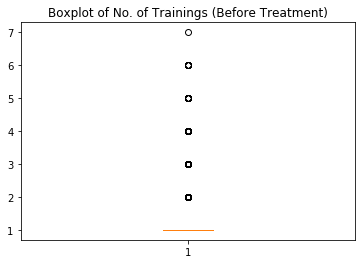

In [253]:
# Boxplot (Before Treatment)
plt.boxplot(df_copy['no_of_trainings'])
plt.title('Boxplot of No. of Trainings (Before Treatment)')

plt.show()

In [254]:
df_copy['no_of_trainings'].describe()

count    9336.000000
mean        1.228685
std         0.567723
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         7.000000
Name: no_of_trainings, dtype: float64

In [255]:
Q1 = 1.000000
Q3 = 1.000000
IQR = Q3 - Q1
Min_value = Q1 - (IQR*1.5)
Max_value = Q3 + (IQR*1.5)
print("Minimum value: {}".format(round(Min_value)))
print("Maximum value: {}".format(round(Max_value)))

Minimum value: 1
Maximum value: 1


In [256]:
#Removing the outliers
df_copy = df_copy.drop(df_copy[df_copy.no_of_trainings == 1].index)

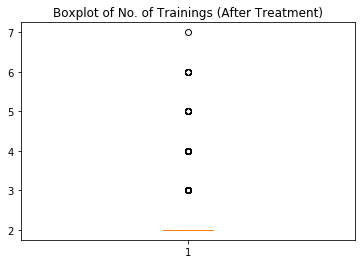

In [257]:
# Boxplot (After Treatment)
plt.boxplot(df_copy['no_of_trainings'])
plt.title('Boxplot of No. of Trainings (After Treatment)')

plt.show()

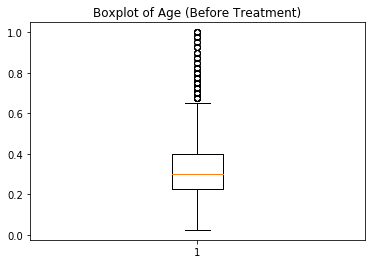

In [258]:
# Boxplot (Before Treatment)
plt.boxplot(df_copy['age'])
plt.title('Boxplot of Age (Before Treatment)')

plt.show()

In [259]:
df_copy['age'].describe()

count    1629.000000
mean        0.335727
std         0.170784
min         0.025000
25%         0.225000
50%         0.300000
75%         0.400000
max         1.000000
Name: age, dtype: float64

In [260]:
Q1 = 0.225000
Q3 = 0.400000
IQR = Q3 - Q1
Min_value = Q1 - (IQR*1.5)
Max_value = Q3 + (IQR*1.5)
print("Minimum value: {}".format(round(Min_value)))
print("Maximum value: {}".format(round(Max_value)))

Minimum value: 0
Maximum value: 1


In [261]:
#Removing the outliers
df_copy = df_copy.drop(df_copy[df_copy.age < 0].index | df_copy[df_copy.age > 1].index)

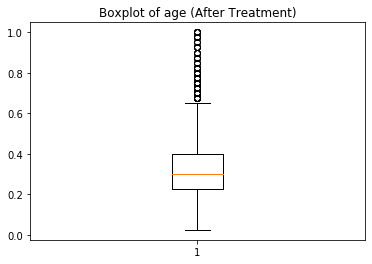

In [262]:
# Boxplot (After Treatment)
plt.boxplot(df_copy['age'])
plt.title('Boxplot of age (After Treatment)')

plt.show()

##### Removed outliers

In [263]:
# Define Model Inputs (X) and Output (y)
X = df_copy.drop('is_promoted',axis=1)
y = df_copy["is_promoted"]

In [264]:
# Split both Inputs (X) and Ouput (y) into training set (70%) and testing set (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [265]:
adb = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=45, learning_rate=1)
adb.fit(X_test, y_test)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                          

In [266]:
# Evaluate the Model using K-folds Cross validation
results  = cross_validate(adb, X, y, scoring='accuracy', cv=5, return_train_score = True)
print('training accuracy by k-folds cross-validation is: ', np.mean(results['train_score']))
print('testing accuracy by k-folds cross-validation is: ', np.mean(results['test_score']))

training accuracy by k-folds cross-validation is:  0.9978514653997742
testing accuracy by k-folds cross-validation is:  0.7072116932428746


##### Retain outliers

In [268]:
# Define Model Inputs (X) and Output (y)
X = df.drop('is_promoted',axis=1)
y = df["is_promoted"]

In [269]:
# Split both Inputs (X) and Ouput (y) into training set (70%) and testing set (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#### 3. XGBoost - eXtreme Gradient Boosting  <a id='xgb' />
XGBoost is an algorithm that has recently been dominating applied machine learning and Kaggle competitions for structured or tabular data. Please click [here](https://machinelearningmastery.com/gentle-introduction-xgboost-applied-machine-learning/) to gain a better understanding on XGBoost. This webpage is also helpful for you to the complete below excercise.

First, you need to install `xgboost` package. 
* For windows users you can type `conda install -c anaconda py-xgboost` in Anaconda terminal to install; 
* For other operating systems, please refer to Anaconda website for details (click [here](https://anaconda.org/search?q=xgboost))

In [80]:
# import XGBClassifier from xgboost package
from xgboost import XGBClassifier 
from sklearn.metrics import accuracy_score

In [86]:
# Task 3: Build XGBoost Model and Evaluate both training and testing accuracy 

# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
print(model)
from xgboost import plot_importance
plot_importance(model.best_estimator_)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


AttributeError: 'XGBClassifier' object has no attribute 'best_estimator_'

(i) Training Accuracy

In [15]:
# make predictions for train data
y_train_pred = model.predict(X_train)
predictions = [round(value) for value in y_train_pred]

In [16]:
# evaluate predictions 
accuracy = accuracy_score(y_train, predictions)
#print("training accuracy: %.2f%%" % (accuracy * 100.0))
print("training accuracy is: ", accuracy)

training accuracy is:  0.7944912012241775


(ii) Testing Accuracy

In [17]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [18]:
# evaluate predictions 
accuracy = accuracy_score(y_test, predictions)
print("testing accuracy is: ", accuracy)
#print("testing accuracy:{}%".format((accuracy * 100.0)))

testing accuracy is:  0.7782934666190646


#### 3.1 Attempt to improve model

#### 3.1.1 By using early stopping rounds parameter

**Before tuning:**
* training accuracy is:  0.996
* testing accuracy is:  0.718
    
**After tuning:**
* No difference

##### 3.1.1.1 Early stopping rounds of 10

Two plots are created. The first shows the logarithmic loss of the XGBoost model for each epoch on the training and test datasets. On the other hand, the second plot shows the classification error of the XGBoost model for each epoch on the training and test datasets.

[0]	validation_0-error:0.255394	validation_0-logloss:0.664316	validation_1-error:0.26919	validation_1-logloss:0.665613
Multiple eval metrics have been passed: 'validation_1-logloss' will be used for early stopping.

Will train until validation_1-logloss hasn't improved in 10 rounds.
[1]	validation_0-error:0.255394	validation_0-logloss:0.640751	validation_1-error:0.26919	validation_1-logloss:0.643304
[2]	validation_0-error:0.255394	validation_0-logloss:0.621266	validation_1-error:0.26919	validation_1-logloss:0.624949
[3]	validation_0-error:0.255394	validation_0-logloss:0.604875	validation_1-error:0.26919	validation_1-logloss:0.609667
[4]	validation_0-error:0.255088	validation_0-logloss:0.590587	validation_1-error:0.268476	validation_1-logloss:0.595871
[5]	validation_0-error:0.255088	validation_0-logloss:0.578604	validation_1-error:0.268476	validation_1-logloss:0.584875
[6]	validation_0-error:0.255088	validation_0-logloss:0.567984	validation_1-error:0.268476	validation_1-logloss:0.574979

[67]	validation_0-error:0.209028	validation_0-logloss:0.433261	validation_1-error:0.222778	validation_1-logloss:0.454289
[68]	validation_0-error:0.207804	validation_0-logloss:0.431765	validation_1-error:0.223135	validation_1-logloss:0.452886
[69]	validation_0-error:0.207345	validation_0-logloss:0.431027	validation_1-error:0.222421	validation_1-logloss:0.45206
[70]	validation_0-error:0.207345	validation_0-logloss:0.43059	validation_1-error:0.222064	validation_1-logloss:0.451828
[71]	validation_0-error:0.207804	validation_0-logloss:0.429983	validation_1-error:0.223135	validation_1-logloss:0.451199
[72]	validation_0-error:0.207804	validation_0-logloss:0.42962	validation_1-error:0.223492	validation_1-logloss:0.451196
[73]	validation_0-error:0.207345	validation_0-logloss:0.429318	validation_1-error:0.223492	validation_1-logloss:0.451045
[74]	validation_0-error:0.207345	validation_0-logloss:0.429044	validation_1-error:0.222778	validation_1-logloss:0.45081
[75]	validation_0-error:0.207192	val

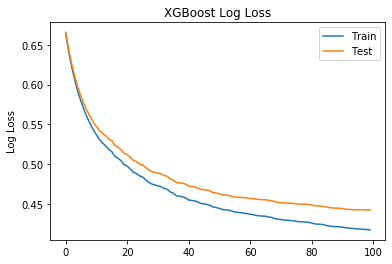

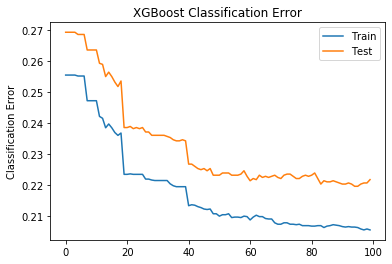

In [49]:
# plot learning curve
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot

eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, early_stopping_rounds=10, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

From reviewing the classification error, it looks like there is an opportunity to stop the learning early, perhaps somewhere around epoch 60 to epoch 80 where error appears to go back up at around epoch 60.

We don't see the exact story for the logloss plot but it is observed that the disparity between training and testing accuracies tend to widen after 40 epoch.

From the above observations
When model.fit is executed with verbose=True, we can see each training run evaluation quality printed out. At the end of the log, I observe that the best accuracy was derived from the last iteration as training accuracy = 1 - validation error. However, this might be because of insufficient number of training rounds adn hence, detecting the best iteration could not be done by the model. In this case, XGBoost has chosen the last iteration to build the model.

##### 3.1.1.2 Increasing Early stopping rounds to 20

**Before tuning:**
* training accuracy is:  0.996
* testing accuracy is:  0.718
    
**After tuning:**
* training accuracy is:  0.809
* testing accuracy is:  0.780

Increasing this parameter can provide the XGBoost model more chances to find a better result

[0]	validation_0-error:0.255394	validation_0-logloss:0.664316	validation_1-error:0.26919	validation_1-logloss:0.665613
Multiple eval metrics have been passed: 'validation_1-logloss' will be used for early stopping.

Will train until validation_1-logloss hasn't improved in 20 rounds.
[1]	validation_0-error:0.255394	validation_0-logloss:0.640751	validation_1-error:0.26919	validation_1-logloss:0.643304
[2]	validation_0-error:0.255394	validation_0-logloss:0.621266	validation_1-error:0.26919	validation_1-logloss:0.624949
[3]	validation_0-error:0.255394	validation_0-logloss:0.604875	validation_1-error:0.26919	validation_1-logloss:0.609667
[4]	validation_0-error:0.255088	validation_0-logloss:0.590587	validation_1-error:0.268476	validation_1-logloss:0.595871
[5]	validation_0-error:0.255088	validation_0-logloss:0.578604	validation_1-error:0.268476	validation_1-logloss:0.584875
[6]	validation_0-error:0.255088	validation_0-logloss:0.567984	validation_1-error:0.268476	validation_1-logloss:0.574979

[67]	validation_0-error:0.209028	validation_0-logloss:0.433261	validation_1-error:0.222778	validation_1-logloss:0.454289
[68]	validation_0-error:0.207804	validation_0-logloss:0.431765	validation_1-error:0.223135	validation_1-logloss:0.452886
[69]	validation_0-error:0.207345	validation_0-logloss:0.431027	validation_1-error:0.222421	validation_1-logloss:0.45206
[70]	validation_0-error:0.207345	validation_0-logloss:0.43059	validation_1-error:0.222064	validation_1-logloss:0.451828
[71]	validation_0-error:0.207804	validation_0-logloss:0.429983	validation_1-error:0.223135	validation_1-logloss:0.451199
[72]	validation_0-error:0.207804	validation_0-logloss:0.42962	validation_1-error:0.223492	validation_1-logloss:0.451196
[73]	validation_0-error:0.207345	validation_0-logloss:0.429318	validation_1-error:0.223492	validation_1-logloss:0.451045
[74]	validation_0-error:0.207345	validation_0-logloss:0.429044	validation_1-error:0.222778	validation_1-logloss:0.45081
[75]	validation_0-error:0.207192	val

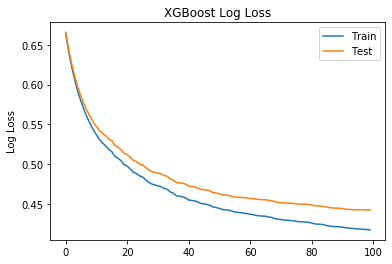

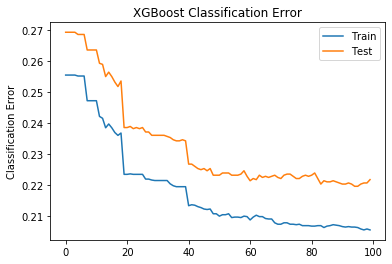

In [20]:
# plot learning curve
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot

eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, early_stopping_rounds=20, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

After increasing the early stopping rounds, the best accuracy remains to be 77.83% and so we will try tuning other parameters instead.

#### 3.1.2 By tuning n_estimators and learning rate

**Before tuning:**
* training accuracy is:  0.996
* testing accuracy is:  0.718
    
**After tuning:**
* training accuracy is:  0.809
* testing accuracy is:  0.780

Smaller learning rates generally require more trees to be added to the model. I have provided 5 variations of n_estimators and 4 variations of learning_rate. Each combination will be evaluated using k-fold cross validation where k = 10, and this means there is a total of 200 XGBoost models that must be trained and evaluated.

Credits: https://machinelearningmastery.com/avoid-overfitting-by-early-stopping-with-xgboost-in-python/ and https://machinelearningmastery.com/tune-learning-rate-for-gradient-boosting-with-xgboost-in-python/

*Smaller log loss means smaller uncertainty and entropy (a measure of randomness of a prediction) of the model

#### Identifying the best combination of n_estimators and learning rate

Best: -0.417746 using {'learning_rate': 0.1, 'n_estimators': 400}
-0.690208 (0.000115) with: {'learning_rate': 0.0001, 'n_estimators': 100}
-0.687327 (0.000227) with: {'learning_rate': 0.0001, 'n_estimators': 200}
-0.684503 (0.000338) with: {'learning_rate': 0.0001, 'n_estimators': 300}
-0.681737 (0.000454) with: {'learning_rate': 0.0001, 'n_estimators': 400}
-0.679025 (0.000570) with: {'learning_rate': 0.0001, 'n_estimators': 500}
-0.666257 (0.001157) with: {'learning_rate': 0.001, 'n_estimators': 100}
-0.644133 (0.002286) with: {'learning_rate': 0.001, 'n_estimators': 200}
-0.625675 (0.003215) with: {'learning_rate': 0.001, 'n_estimators': 300}
-0.609831 (0.003973) with: {'learning_rate': 0.001, 'n_estimators': 400}
-0.596215 (0.004664) with: {'learning_rate': 0.001, 'n_estimators': 500}
-0.550039 (0.006951) with: {'learning_rate': 0.01, 'n_estimators': 100}
-0.508816 (0.009395) with: {'learning_rate': 0.01, 'n_estimators': 200}
-0.485940 (0.009247) with: {'learning_rate': 0.01, 'n_e

C:\Users\sammi\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


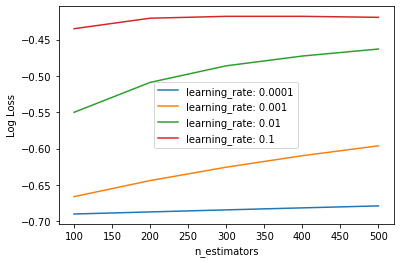

In [52]:
# XGBoost on Otto dataset, Tune learning_rate and n_estimators
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
import matplotlib
matplotlib.use('Agg')
from matplotlib import pyplot
import numpy

# encode string class values as integers
label_encoded_y = LabelEncoder().fit_transform(y)
# grid search
model = XGBClassifier()
n_estimators = [100, 200, 300, 400, 500]
learning_rate = [0.0001, 0.001, 0.01, 0.1]
param_grid = dict(learning_rate=learning_rate, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X, label_encoded_y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
# plot results
scores = numpy.array(means).reshape(len(learning_rate), len(n_estimators))
for i, value in enumerate(learning_rate):
    pyplot.plot(n_estimators, scores[i], label='learning_rate: ' + str(value))
pyplot.legend()
pyplot.xlabel('n_estimators')
pyplot.ylabel('Log Loss')
pyplot.show()

The graph proves that indeed, as the number of trees increase, the better the performance of the inverted log loss. As shown from the log loss against n_estimators graph, the learning rate of 0.0001 has showed a log loss furthest from 0 with lowest value of about -0.69 and that means that there is more uncertainty. On the other hand, a learning rate of 0.1 shows the best log loss value with lowest of -0.45.

#### Understanding the correlation between log loss and n_estimators

Running this code has shown that increasing the number of trees has increased the performance of the model (closer to 0). However, it is important to note that a plateau is reached from n_estimators of 300 to 400. It decreases from 400 which may mean that the optimal n_estimator value is 400.

C:\Users\sammi\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


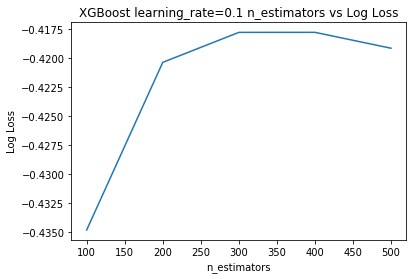

In [59]:
# Plot performance for learning_rate=0.1
from matplotlib import pyplot
n_estimators = [100, 200, 300, 400, 500]
loss = [-0.434794, -0.420335, -0.417749, -0.417746, -0.419117]
pyplot.plot(n_estimators, loss)
pyplot.xlabel('n_estimators')
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost learning_rate=0.1 n_estimators vs Log Loss')
pyplot.show()

In [65]:
model = XGBClassifier(objective='binary:logistic',
                        n_estimators=400,
                        learning_rate = 0.1)

eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=eval_set, verbose=False)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=400, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

(i) Training Accuracy

In [66]:
# make predictions for train data
y_train_pred = model.predict(X_train)
predictions = [round(value) for value in y_train_pred]

In [67]:
# evaluate predictions 
accuracy = accuracy_score(y_train, predictions)
#print("training accuracy: %.2f%%" % (accuracy * 100.0))
print("training accuracy is: ", accuracy)

training accuracy is:  0.8087222647283856


(ii) Testing Accuracy

In [68]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [69]:
# evaluate predictions 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print("testing accuracy is: ", accuracy)
#print("testing accuracy:{}%".format((accuracy * 100.0)))

testing accuracy is:  0.7804355587290254


#### 3.1.3 By tuning max_depth

**No need for tuning since max_depth was already set at an optimal value**
* training accuracy is:  0.809
* testing accuracy is:  0.780

#### Finding the best max_depth

range(1, 11, 2)
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   30.7s finished


Best: -0.417746 using {'max_depth': 3}
-0.506086 (0.006759) with: {'max_depth': 1}
-0.417746 (0.013234) with: {'max_depth': 3}
-0.435232 (0.016135) with: {'max_depth': 5}
-0.475463 (0.021398) with: {'max_depth': 7}
-0.528313 (0.024300) with: {'max_depth': 9}


Text(0, 0.5, 'Log Loss')

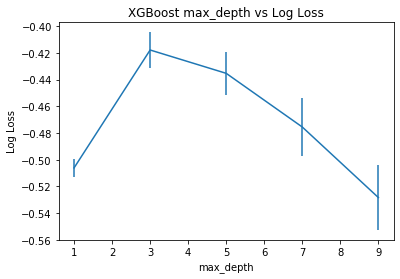

In [77]:
# XGBoost on Otto dataset, Tune max_depth
from pandas import read_csv
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
import matplotlib
matplotlib.use('Agg')
from matplotlib import pyplot

max_depth = range(1, 11, 2)
print(max_depth)
param_grid = dict(max_depth=max_depth)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X, label_encoded_y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
# plot
pyplot.errorbar(max_depth, means, yerr=stds)
pyplot.title("XGBoost max_depth vs Log Loss")
pyplot.xlabel('max_depth')
pyplot.ylabel('Log Loss')

Running the codes displays the log loss for each max_depth value that I have inputted into the GridSearch. According to the graph, the best max_depth is at 3 as we get returned the lowest log loss of -0.417746 

In [82]:
model = XGBClassifier(objective='binary:logistic',
                        n_estimators=400,
                        learning_rate = 0.1,
                        nax_depth = 3)

eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=eval_set, verbose=False)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=400, n_jobs=1,
              nax_depth=3, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

(i) Training Accuracy

In [72]:
# make predictions for train data
y_train_pred = model.predict(X_train)
predictions = [round(value) for value in y_train_pred]

In [73]:
# evaluate predictions 
accuracy = accuracy_score(y_train, predictions)
#print("training accuracy: %.2f%%" % (accuracy * 100.0))
print("training accuracy is: ", accuracy)

training accuracy is:  0.8087222647283856


(ii) Testing Accuracy

In [74]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [75]:
# evaluate predictions 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print("testing accuracy is: ", accuracy)
#print("testing accuracy:{}%".format((accuracy * 100.0)))

testing accuracy is:  0.7804355587290254


#### Finding the best combination between max_depth and n_estimators (worsen from 0.7804 to 0.7797)

We can investigate the relationship between max_depth and n_estimators by evaluating a grid of n_estimators and max_depth configuration values. To avoid the evaluation taking too long, we will limit the total number of configuration values evaluated. Parameters were chosen to tease out the relationship rather than optimize the model.

We will create a grid of 4 different n_estimators values (50, 100, 150, 200) and 4 different max_depth values (2, 4, 6, 8) and each combination will be evaluated using 10-fold cross validation. A total of 4*4*10 or 160 models will be trained and evaluated.

Credits: https://machinelearningmastery.com/tune-number-size-decision-trees-xgboost-python/

[2, 4, 6, 8]
Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   28.5s finished


Best: -0.416056 using {'max_depth': 4, 'n_estimators': 200}
-0.495610 (0.009780) with: {'max_depth': 2, 'n_estimators': 50}
-0.469314 (0.009278) with: {'max_depth': 2, 'n_estimators': 100}
-0.458061 (0.009190) with: {'max_depth': 2, 'n_estimators': 150}
-0.450285 (0.009586) with: {'max_depth': 2, 'n_estimators': 200}
-0.436060 (0.012192) with: {'max_depth': 4, 'n_estimators': 50}
-0.419415 (0.013034) with: {'max_depth': 4, 'n_estimators': 100}
-0.416121 (0.013978) with: {'max_depth': 4, 'n_estimators': 150}
-0.416056 (0.014173) with: {'max_depth': 4, 'n_estimators': 200}
-0.422809 (0.012997) with: {'max_depth': 6, 'n_estimators': 50}
-0.420509 (0.014576) with: {'max_depth': 6, 'n_estimators': 100}
-0.424541 (0.014440) with: {'max_depth': 6, 'n_estimators': 150}
-0.429624 (0.015149) with: {'max_depth': 6, 'n_estimators': 200}
-0.423182 (0.013577) with: {'max_depth': 8, 'n_estimators': 50}
-0.431193 (0.015591) with: {'max_depth': 8, 'n_estimators': 100}
-0.442473 (0.016823) with: {'max_d

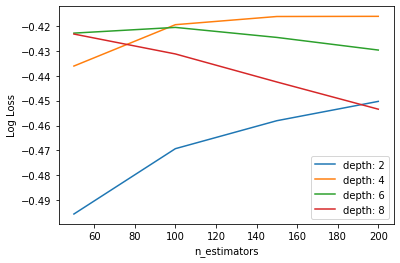

In [78]:
# XGBoost on Otto dataset, Tune n_estimators and max_depth
from pandas import read_csv
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
import matplotlib
matplotlib.use('Agg')
from matplotlib import pyplot
import numpy

# grid search
model = XGBClassifier()
n_estimators = [50, 100, 150, 200]
max_depth = [2, 4, 6, 8]
print(max_depth)
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X, label_encoded_y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
# plot results
scores = numpy.array(means).reshape(len(max_depth), len(n_estimators))
for i, value in enumerate(max_depth):
    pyplot.plot(n_estimators, scores[i], label='depth: ' + str(value))
pyplot.legend()
pyplot.xlabel('n_estimators')
pyplot.ylabel('Log Loss')
pyplot.savefig('n_estimators_vs_max_depth.png')

In [21]:
model = XGBClassifier(objective='binary:logistic',
                        n_estimators=200,
                        learning_rate = 0.1,
                        max_depth = 4)

eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=eval_set, verbose=False)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

(i) Training Accuracy

In [22]:
# make predictions for train data
y_train_pred = model.predict(X_train)
predictions = [round(value) for value in y_train_pred]

In [23]:
# evaluate predictions 
accuracy = accuracy_score(y_train, predictions)
#print("training accuracy: %.2f%%" % (accuracy * 100.0))
print("training accuracy is: ", accuracy)

training accuracy is:  0.8188217291507268


(ii) Testing Accuracy

In [24]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [25]:
# evaluate predictions 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print("testing accuracy is: ", accuracy)
#print("testing accuracy:{}%".format((accuracy * 100.0)))

testing accuracy is:  0.7797215280257052


### 1.2.5 SVM - Support Vector Machine

In [37]:
# Task 4: Build SVM Model and Evaluate both training and testing accuracy 
from sklearn.svm import SVC
SVC()

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [43]:
dir(SVC)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_proba',
 '_compute_kernel',
 '_decision_function',
 '_dense_decision_function',
 '_dense_fit',
 '_dense_predict',
 '_dense_predict_proba',
 '_estimator_type',
 '_get_coef',
 '_get_param_names',
 '_get_tags',
 '_impl',
 '_pairwise',
 '_predict_log_proba',
 '_predict_proba',
 '_sparse_decision_function',
 '_sparse_fit',
 '_sparse_kernels',
 '_sparse_predict',
 '_sparse_predict_proba',
 '_validate_for_predict',
 '_validate_targets',
 '_warn_from_fit_status',
 'coef_',
 'decision_function',
 'fit',
 'get_params',
 'predict',
 'predict_log_proba',


In [44]:
svc = SVC(C=0.8, kernel='rbf')
svc.fit(X_train,y_train)

C:\Users\sammi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=0.8, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [29]:
len(svc.predict(X_train))

6535

In [30]:
len(X_train)

6535

In [10]:
print('training accuracy is: ', svc.score(X_train,y_train))
print('testing accuracy is: ', svc.score(X_test, y_test))

training accuracy is:  0.786381025248661
testing accuracy is:  0.7443770082113531


#### Attempt to improve performance with GridSearch

C value is how closely the model fits to the training data, which is essentially a regularisation parameter as it controls the complexity of the parameter. Hence, a higher C value means low regularisation as data will try to fit the data very well to prevent the large penalty. On the other hand, a lower C value will tend to capture overall pattern of data and hence, it may lead to underfitting. Hence, it is important that we balance this well.

In [28]:
import warnings
warnings.filterwarnings('ignore', category = FutureWarning)

In [38]:
def print_results(results):
    print("BEST PARAM: {}\n".format(results.best_params_))
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print("{} (+/1 {}) for {}".format(round(mean, 3), round(std*2,3), params))

In [63]:
svc = SVC()
parameters = {
        'C': [0.001, 0.1, 0.5]
}

cv = GridSearchCV(svc, parameters, cv = 5)
cv.fit(X_train,y_train)
print_results(cv)
print('training accuracy is: ', cv.score(X_train,y_train))
print('testing accuracy is: ', cv.score(X_test, y_test))

C:\Users\sammi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\sammi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\sammi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\sammi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

BEST PARAM: {'C': 0.5}

0.528 (+/1 0.112) for {'C': 0.001}
0.716 (+/1 0.03) for {'C': 0.1}
0.75 (+/1 0.026) for {'C': 0.5}
training accuracy is:  0.7768936495791889
testing accuracy is:  0.744019992859693


In [65]:
svc = SVC()
parameters = {
        'C': [0.1, 1,4]
}

cv = GridSearchCV(svc, parameters, cv = 5)
cv.fit(X_train,y_train)
print_results(cv)
print('training accuracy is: ', cv.score(X_train,y_train))
print('testing accuracy is: ', cv.score(X_test, y_test))

C:\Users\sammi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\sammi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\sammi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\sammi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

BEST PARAM: {'C': 4}

0.716 (+/1 0.03) for {'C': 0.1}
0.757 (+/1 0.019) for {'C': 1}
0.765 (+/1 0.027) for {'C': 4}
training accuracy is:  0.8208110175975516
testing accuracy is:  0.746876115672974


In [58]:
svc = SVC()
parameters = {
        'C': [0.1, 1, 2]
}

cv = GridSearchCV(svc, parameters, cv = 5)
cv.fit(X_train,y_train)
print_results(cv)
print('training accuracy is: ', cv.score(X_train,y_train))
print('testing accuracy is: ', cv.score(X_test, y_test))

C:\Users\sammi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\sammi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\sammi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\sammi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

BEST PARAM: {'C': 2}

0.716 (+/1 0.03) for {'C': 0.1}
0.757 (+/1 0.019) for {'C': 1}
0.761 (+/1 0.025) for {'C': 2}
training accuracy is:  0.8024483550114767
testing accuracy is:  0.7486611924312745


#### Attempt to improve wth Kernel

In [9]:
from sklearn.metrics import classification_report, confusion_matrix

In [55]:
kernels = ['linear','rbf','sigmoid']
for k in kernels:
    svc = SVC(C=2, kernel=k)
    svc.fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    print(confusion_matrix(y_test,y_pred))
    print("Kernel = "+str(k))
    print(classification_report(y_test,y_pred))

[[ 931  469]
 [ 355 1046]]
Kernel = linear
              precision    recall  f1-score   support

           0       0.72      0.67      0.69      1400
           1       0.69      0.75      0.72      1401

    accuracy                           0.71      2801
   macro avg       0.71      0.71      0.71      2801
weighted avg       0.71      0.71      0.71      2801



C:\Users\sammi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[[ 912  488]
 [ 216 1185]]
Kernel = rbf
              precision    recall  f1-score   support

           0       0.81      0.65      0.72      1400
           1       0.71      0.85      0.77      1401

    accuracy                           0.75      2801
   macro avg       0.76      0.75      0.75      2801
weighted avg       0.76      0.75      0.75      2801



C:\Users\sammi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[[703 697]
 [836 565]]
Kernel = sigmoid
              precision    recall  f1-score   support

           0       0.46      0.50      0.48      1400
           1       0.45      0.40      0.42      1401

    accuracy                           0.45      2801
   macro avg       0.45      0.45      0.45      2801
weighted avg       0.45      0.45      0.45      2801



In [10]:
svc = SVC(C=2, kernel='linear')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 931  469]
 [ 355 1046]]
              precision    recall  f1-score   support

           0       0.72      0.67      0.69      1400
           1       0.69      0.75      0.72      1401

    accuracy                           0.71      2801
   macro avg       0.71      0.71      0.71      2801
weighted avg       0.71      0.71      0.71      2801



In [11]:
svc = SVC(C=2, kernel='rbf')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

C:\Users\sammi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[[ 912  488]
 [ 216 1185]]
              precision    recall  f1-score   support

           0       0.81      0.65      0.72      1400
           1       0.71      0.85      0.77      1401

    accuracy                           0.75      2801
   macro avg       0.76      0.75      0.75      2801
weighted avg       0.76      0.75      0.75      2801



In [10]:
svc = SVC(C=2, kernel='sigmoid')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

C:\Users\sammi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[[703 697]
 [836 565]]
              precision    recall  f1-score   support

           0       0.46      0.50      0.48      1400
           1       0.45      0.40      0.42      1401

    accuracy                           0.45      2801
   macro avg       0.45      0.45      0.45      2801
weighted avg       0.45      0.45      0.45      2801



In [57]:
# Using RBF
svc = SVC(C=2, kernel='rbf')
svc.fit(X_train, y_train)
print('training accuracy is: ', svc.score(X_train,y_train))
print('testing accuracy is: ', svc.score(X_test, y_test))

C:\Users\sammi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


training accuracy is:  0.8024483550114767
testing accuracy is:  0.7486611924312745


In [73]:
svc = SVC(C=2, kernel='rbf')
svc.fit(X_train,y_train)

C:\Users\sammi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

#### How to improve Gamma

In [54]:
gammas = [0.1, 1, 10, 100]
for g in gammas:
    svc = SVC(kernel='rbf', C=2, gamma=g)
    svc.fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    print("Gamma = "+ str(g))
    print(classification_report(y_test,y_pred))

Gamma = 0.1
              precision    recall  f1-score   support

           0       0.81      0.65      0.72      1400
           1       0.71      0.84      0.77      1401

    accuracy                           0.75      2801
   macro avg       0.76      0.75      0.75      2801
weighted avg       0.76      0.75      0.75      2801

Gamma = 1
              precision    recall  f1-score   support

           0       0.69      0.69      0.69      1400
           1       0.69      0.69      0.69      1401

    accuracy                           0.69      2801
   macro avg       0.69      0.69      0.69      2801
weighted avg       0.69      0.69      0.69      2801

Gamma = 10
              precision    recall  f1-score   support

           0       0.52      0.95      0.67      1400
           1       0.70      0.12      0.20      1401

    accuracy                           0.53      2801
   macro avg       0.61      0.53      0.44      2801
weighted avg       0.61      0.53      0.

In [74]:
gammas = [0.001, 0.01, 0.05, 0.1, 1, 10]
print("{0:<7} {1:<19} {2:<19}".format("Gamma", "Training Accuracy", "Testing Accuracy"))
for g in gammas:
    svc = SVC(kernel='rbf', C=2, gamma=g)
    svc.fit(X_train, y_train)
    print("{0:<7} {1:<19.3f} {2:<19.3f}".format(g, svc.score(X_train,y_train), svc.score(X_test, y_test)))

Gamma   Training Accuracy   Testing Accuracy   
0.001   0.749               0.739              
0.01    0.754               0.733              
0.05    0.784               0.748              
0.1     0.812               0.748              
1       0.973               0.691              
10      0.991               0.534              


In [79]:
start = time.time()
svc = SVC(kernel='rbf', C=2, gamma=g)
svc.fit(X_train, y_train)
print('Execution time: {0:.2f} seconds.'.format(time.time() - start))

Execution time: 3.87 seconds.
